In [14]:
import json
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

def generate_wordcloud_from_freq(file_path, company_name, output_dir="../../data/Visualization"):
    # Load frequency data
    with open(file_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    
    # Convert list of dicts into a frequency dictionary
    freq_dict = {entry["Word"]: entry["Frequency"] for entry in data}

    # Generate word cloud
    wc = WordCloud(
        width=800,
        height=400,
        background_color="white",
        colormap="viridis"
    ).generate_from_frequencies(freq_dict)

    # Plot and save
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{company_name} Word Cloud")
    plt.tight_layout()

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Generate the file name and save the image
    filename = f"{company_name.lower().replace(' ', '_')}_wordcloud.png"
    output_path = os.path.join(output_dir, filename)

    # Save the word cloud as a PNG file
    plt.savefig(output_path, dpi=300)
    plt.show()
    plt.close()

    print(f"Saved word cloud for {company_name} at: {output_path}")


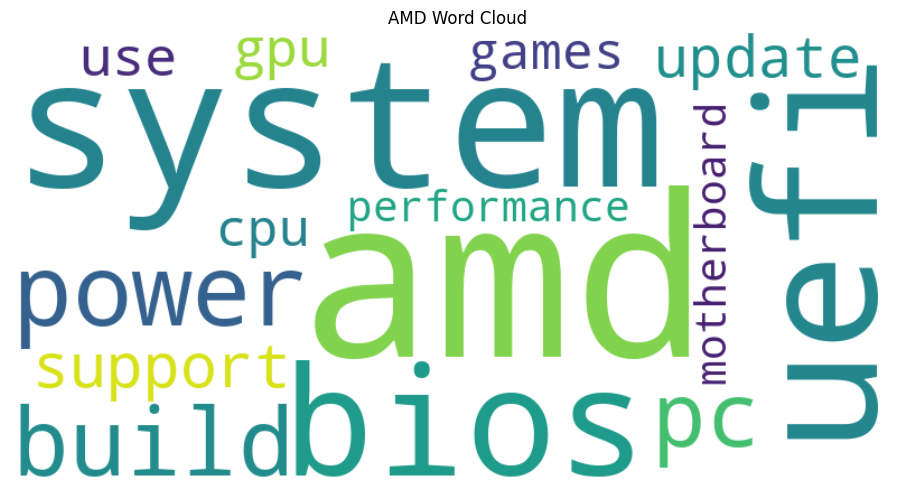

Saved word cloud for AMD at: ../../data/Visualization\amd_wordcloud.png


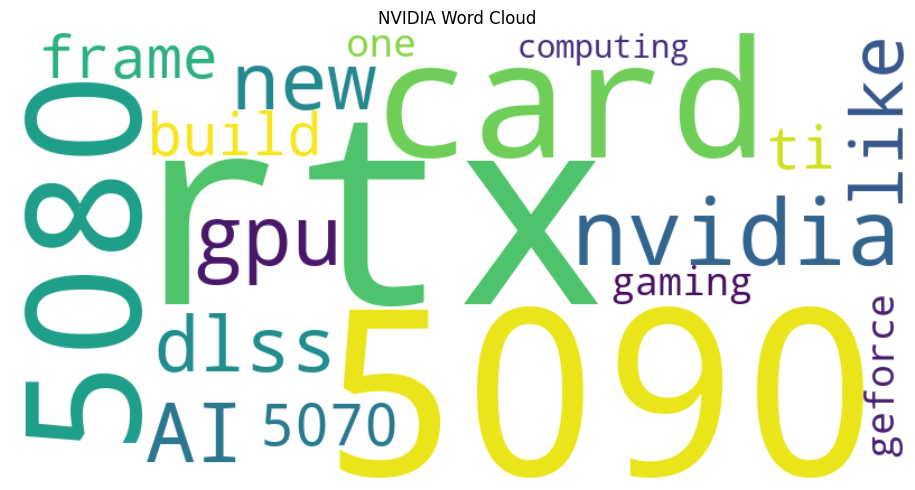

Saved word cloud for NVIDIA at: ../../data/Visualization\nvidia_wordcloud.png


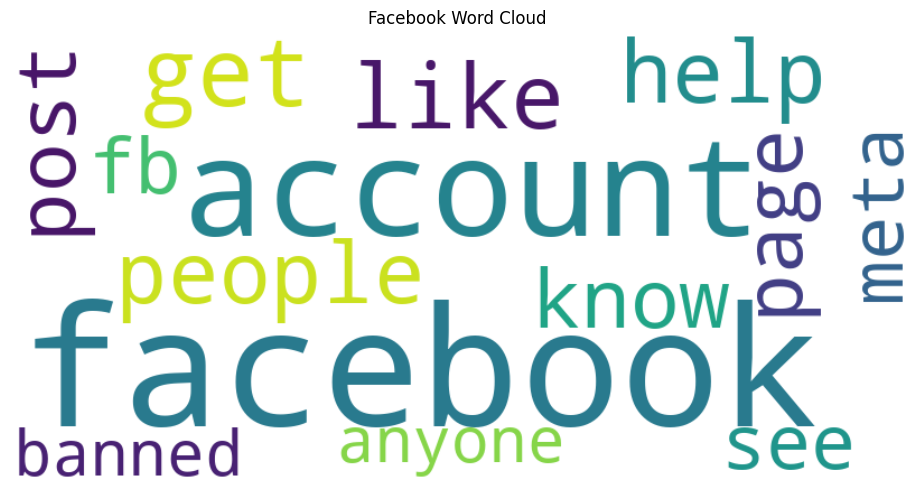

Saved word cloud for Facebook at: ../../data/Visualization\facebook_wordcloud.png


In [17]:
company_files = {
    "AMD": "../../data/PostEDA/AMD/Words.json",
    "NVIDIA": "../../data/PostEDA/NVIDIA/Words.json",
    "Facebook": "../../data/PostEDA/Facebook/Words.json"
}

for company_name, file_path in company_files.items():
    generate_wordcloud_from_freq(file_path, company_name)
